# Plotting the strain against time for SMBH binary before & after the merge(completed) 

The Chirp mass is 2.61165168989e+31kg
the SMBH binary merge at the frequency omega_R =252.666666667Hz
the strain of the GW when SMBH binary merge is: 2.50904422955e-20m
the characteristic time for the exponential decay of the amplitude of GW in the ringdoewn phase is: 0.03324s


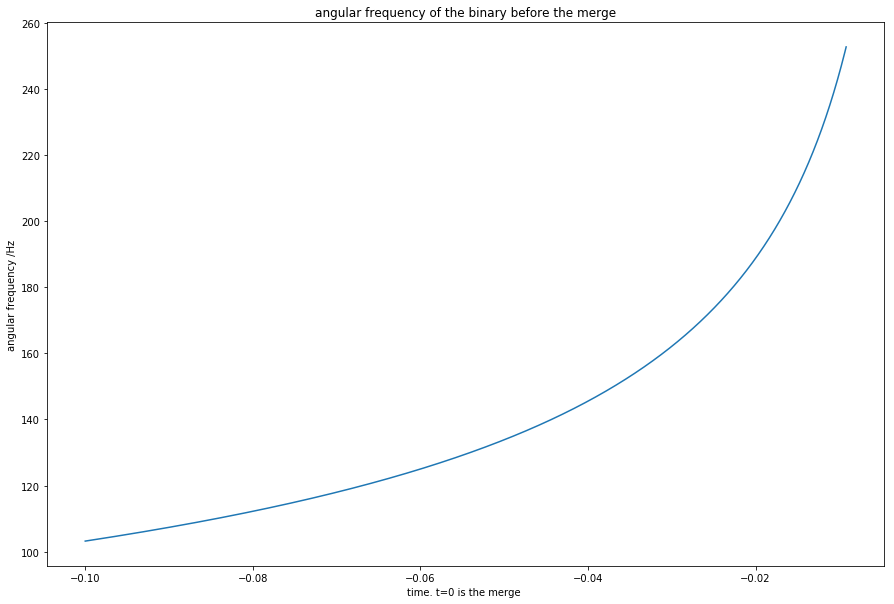

the time the binary merge is:-0.0091874s
The frequency before the merge is:252.667419942
the SMBH binary merge at the Chandrasaeker frequency omega_R =252.666666667Hz
the frequency just before the berge from the Newtonian model is: 252.667419942Hz


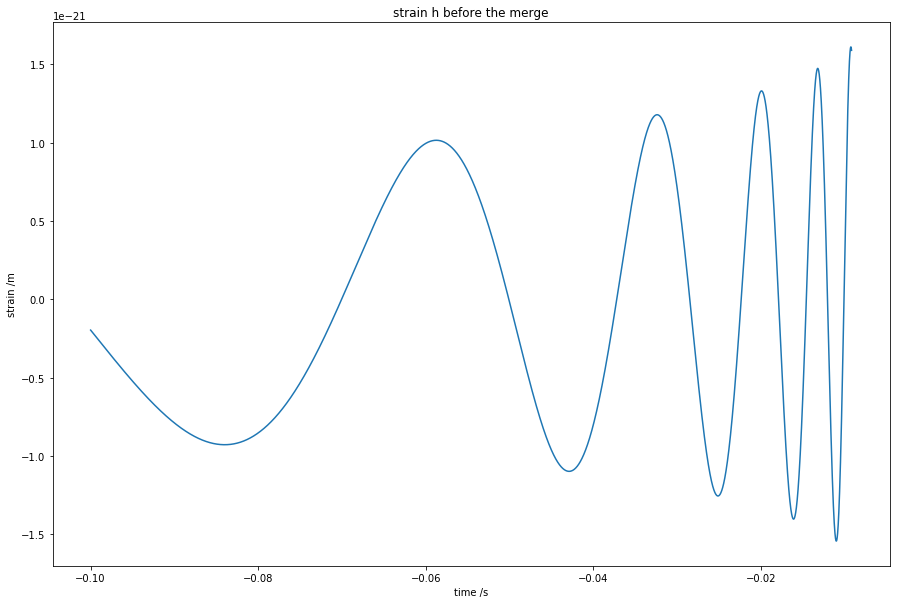

the strain just before the collision is:1.58984402675e-21m


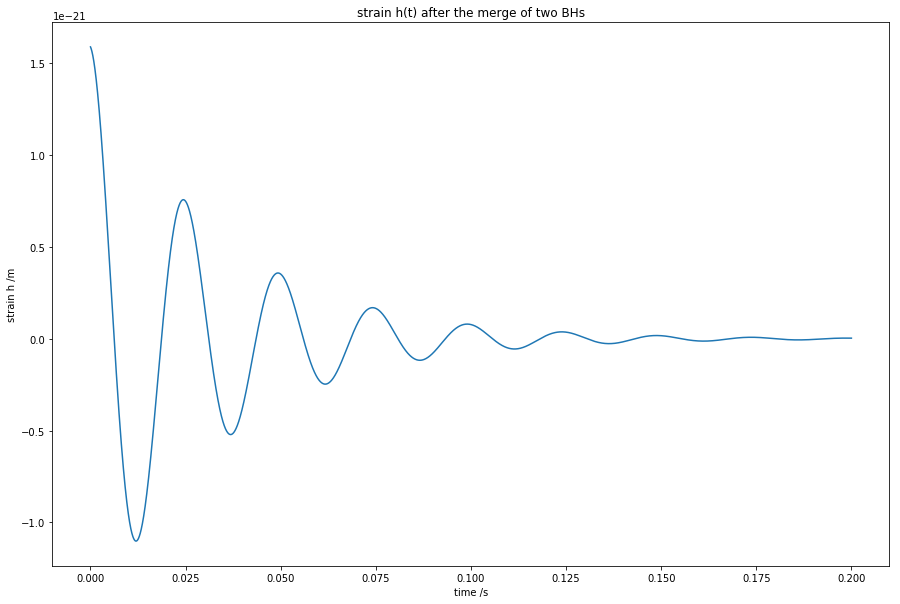

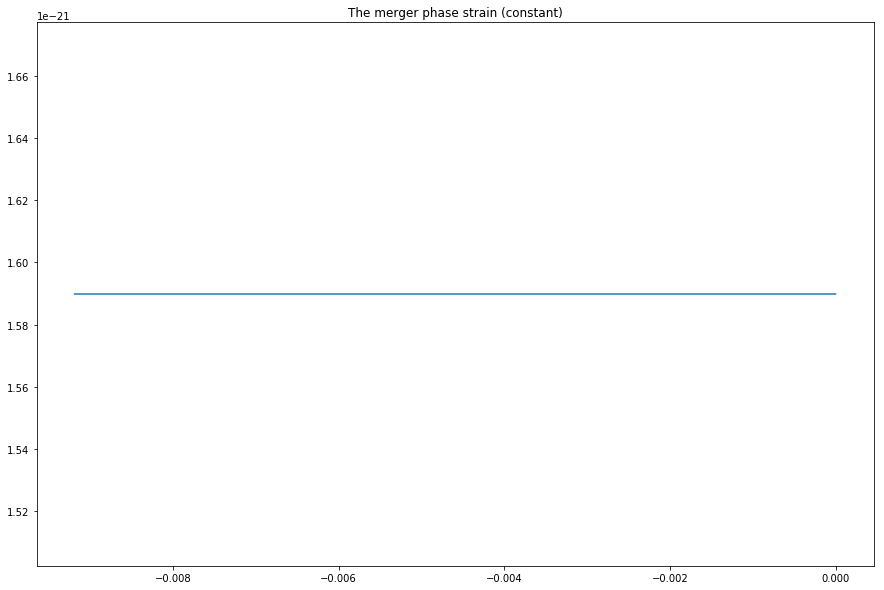

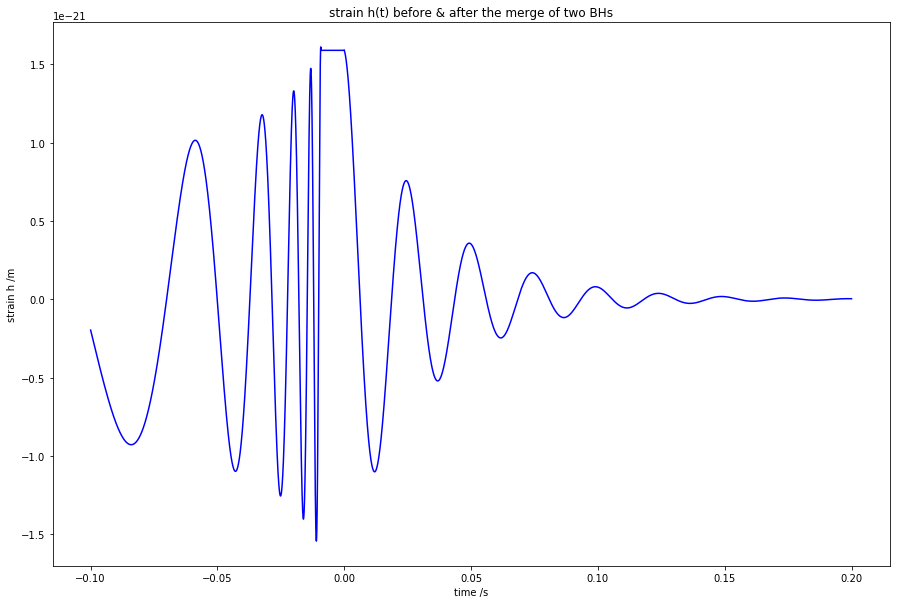

In [11]:
import math 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#everything is in standard unit SI
#define the global variables--------------------------------------------------------------------------------
c=2.9979e8    #speed of light
G=6.67e-11    #Gravitational const
Mpc=3.09e22     #paesec in m
D=100*Mpc       #assume the binary lie at 100Mpc
Msun = 2.e30 #solar mass
#----------------------------------------------------------------------------------------------------------


#mass of merging BHs two identical SMBHs
M1=15.0*Msun
M2=15.0*Msun

M_c = (((M1*M2)**3)/(M1+M2))**0.2    #Chirp mass
M = M1 + M2     #total mass of the binary
mu = (M1*M2)/(M1+M2)    #reduced mass of the binary

print ("The Chirp mass is " + str(M_c) + "kg")
#------------------------------------------------------------------------------------------------------------

#from Newtonian Virial theorem, the angular frequency of BH binary is

def omega(t): 
    return (-512. /5. *(G*M)**(5./3.) /c**5. *t)**(-3./8.) 

#strain(t) before Chandrasaeker frequency is reached

def h_0(t):
    return 4. * G / c**2. * M_c / D * (G / c**3. * omega(t) * M_c)**(2./3.)
#----------------------------------------------------------------------------------
#Switch frequency is omega_R in Hz

omega_R = 7.58 / (M /10 /Msun) *100
print ("the SMBH binary merge at the frequency omega_R =" + str(omega_R) +"Hz")

#switch strain at h(omega_R)

h_0_R = 4 * G / c**2 * M_c / D * (G / c**3 * omega_R * M_c)**(2/3)
print("the strain of the GW when SMBH binary merge is: " + str(h_0_R) + "m")

#After the merge, the strain shows exponential decay with constant frequency omega_R with characteristic time of t_R

t_R = 0.554 * (60* Msun / 10 /Msun) /100  # in second

print ("the characteristic time for the exponential decay of the amplitude of GW in the ringdoewn phase is: " + str(t_R) +"s")

#----------------------------------------------------------------------------------------------------------------


Tlist=[]
omegalist=[]
i=0.
while omega(-0.1+0.0000001*i) < omega_R: 
    i +=1.
    Tlist.append(-0.1+0.0000001*i)
    omegalist.append(omega(-0.1+0.0000001*i))
    
plt.plot(Tlist, omegalist)
#plt.yscale('log')
plt.title("angular frequency of the binary before the merge")
plt.xlabel("time. t=0 is the merge ")
plt.ylabel("angular frequency /Hz")
plt.show()
print("the time the binary merge is:" +str(Tlist[-1]) +"s")
print("The frequency before the merge is:" + str(omegalist[-1]))
print ("the SMBH binary merge at the Chandrasaeker frequency omega_R =" + str(omega_R) +"Hz")
print ("the frequency just before the berge from the Newtonian model is: " + str(omegalist[-1]) + "Hz")



    
    
t=0.
t_list=[]
h_list=[]
j=0
while omega(-0.1+0.000001*j) < omega_R:      # time from -0.1 till 0
    j +=1.
    t_list.append(-0.1+0.000001*j)
    h_list.append(h_0(-0.1+0.000001*j) *math.cos(2.*omega(-0.1+0.000001*j)*-0.1+0.000001*j) )
    
    
plt.plot(t_list, h_list)
plt.title("strain h before the merge")
plt.xlabel("time /s")
plt.ylabel("strain /m")
plt.show()

print ("the strain just before the collision is:" + str(h_list[-1]) + "m")
h2_list=[]
t2_list=[]
for i in range(20000):
    t2_list.append(0.00001*i)
    
    h2_list.append(h_list[-1] *math.cos(omega_R * 0.00001* i) *math.exp(-0.00001 * i / t_R))
    
plt.plot(t2_list, h2_list)
plt.title("strain h(t) after the merge of two BHs")
plt.xlabel("time /s")
plt.ylabel("strain h /m")
mpl.rcParams["figure.figsize"] = (15,10)
plt.show()


#the merger phase
k=0
t_m=Tlist[-1]
t_m_list = []
h_m_list = []
h_m=omegalist[-1]
while Tlist[-1]+k*0.0000001 <0.0:
    k +=1
    t_m_list.append(Tlist[-1]+k*0.0000001)
    h_m_list.append(h_list[-1])


plt.plot(t_m_list, h_m_list)    
plt.title("The merger phase strain (constant)")
plt.show()    


#Combining these
plt.plot(t_list, h_list, "b")
plt.plot(t_m_list, h_m_list, "b")
plt.plot(t2_list, h2_list, "b")
plt.title("strain h(t) before & after the merge of two BHs")
plt.xlabel("time /s")
plt.ylabel("strain h /m")
mpl.rcParams["figure.figsize"] = (15,10)
plt.show()

# Data processing of GW singal in noise

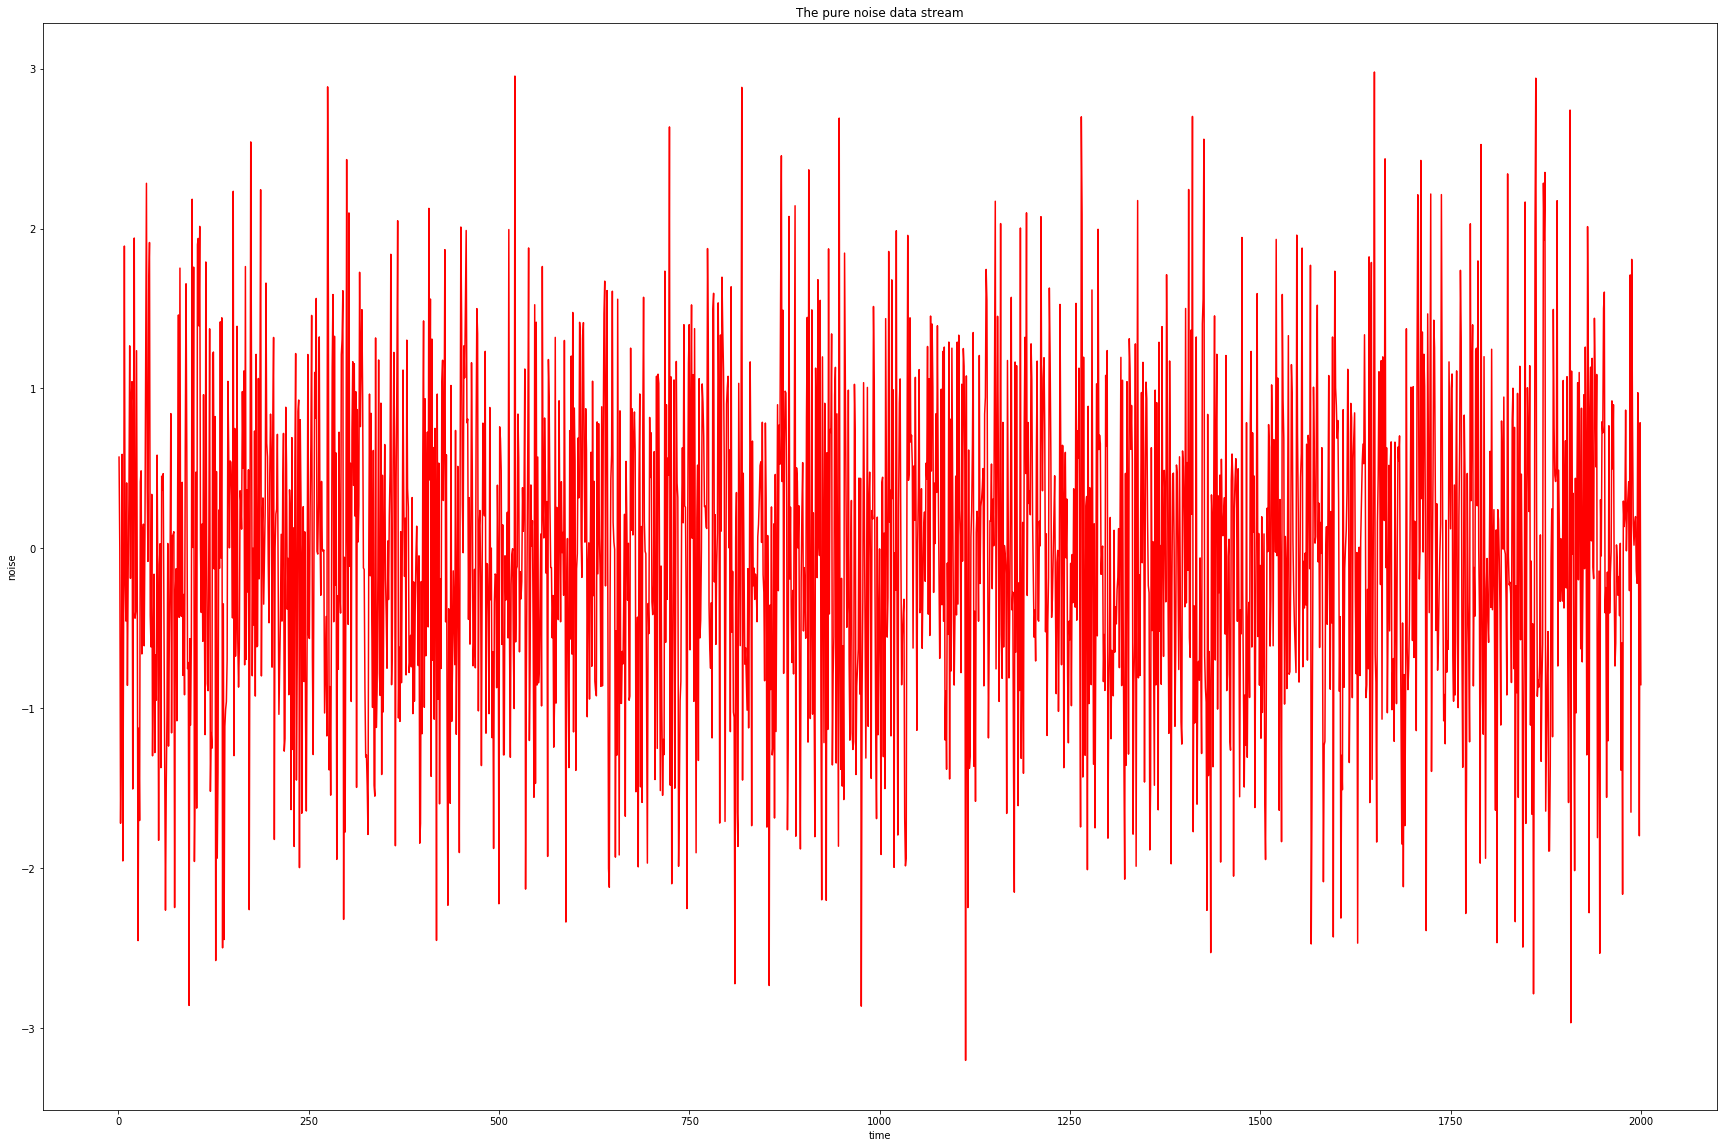

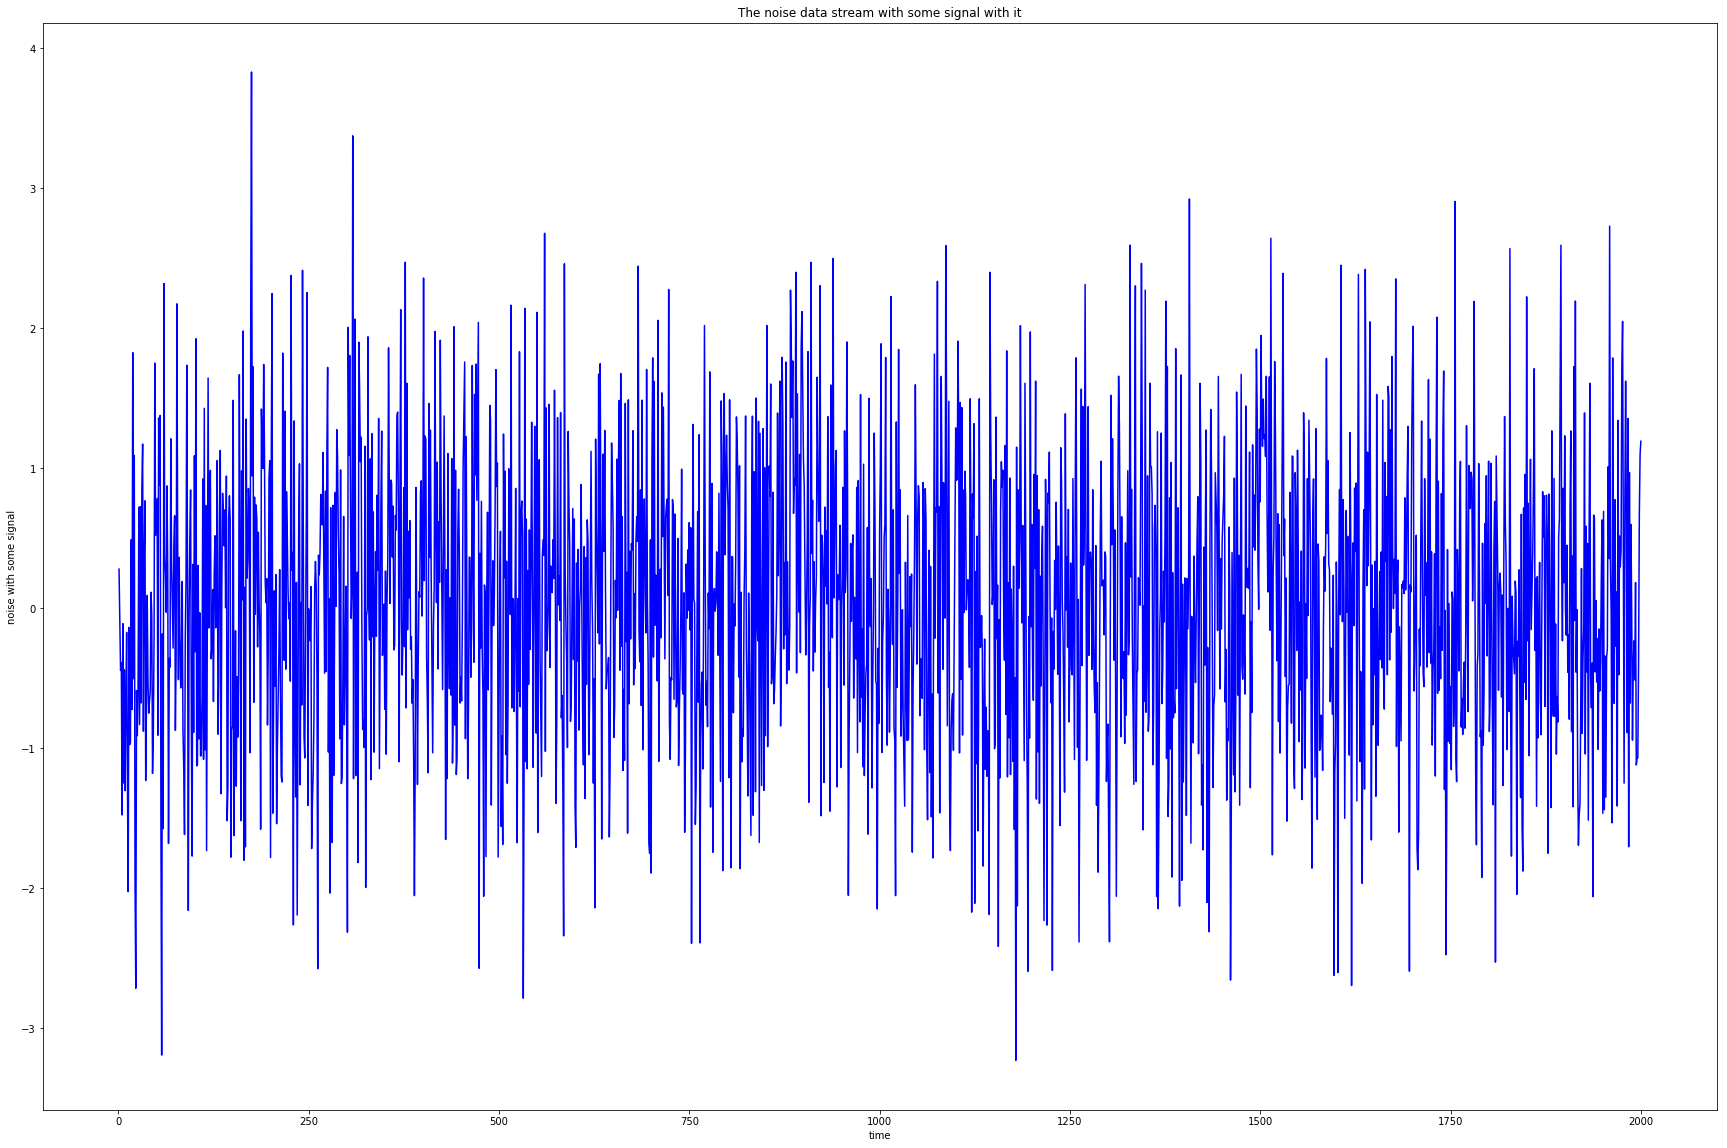

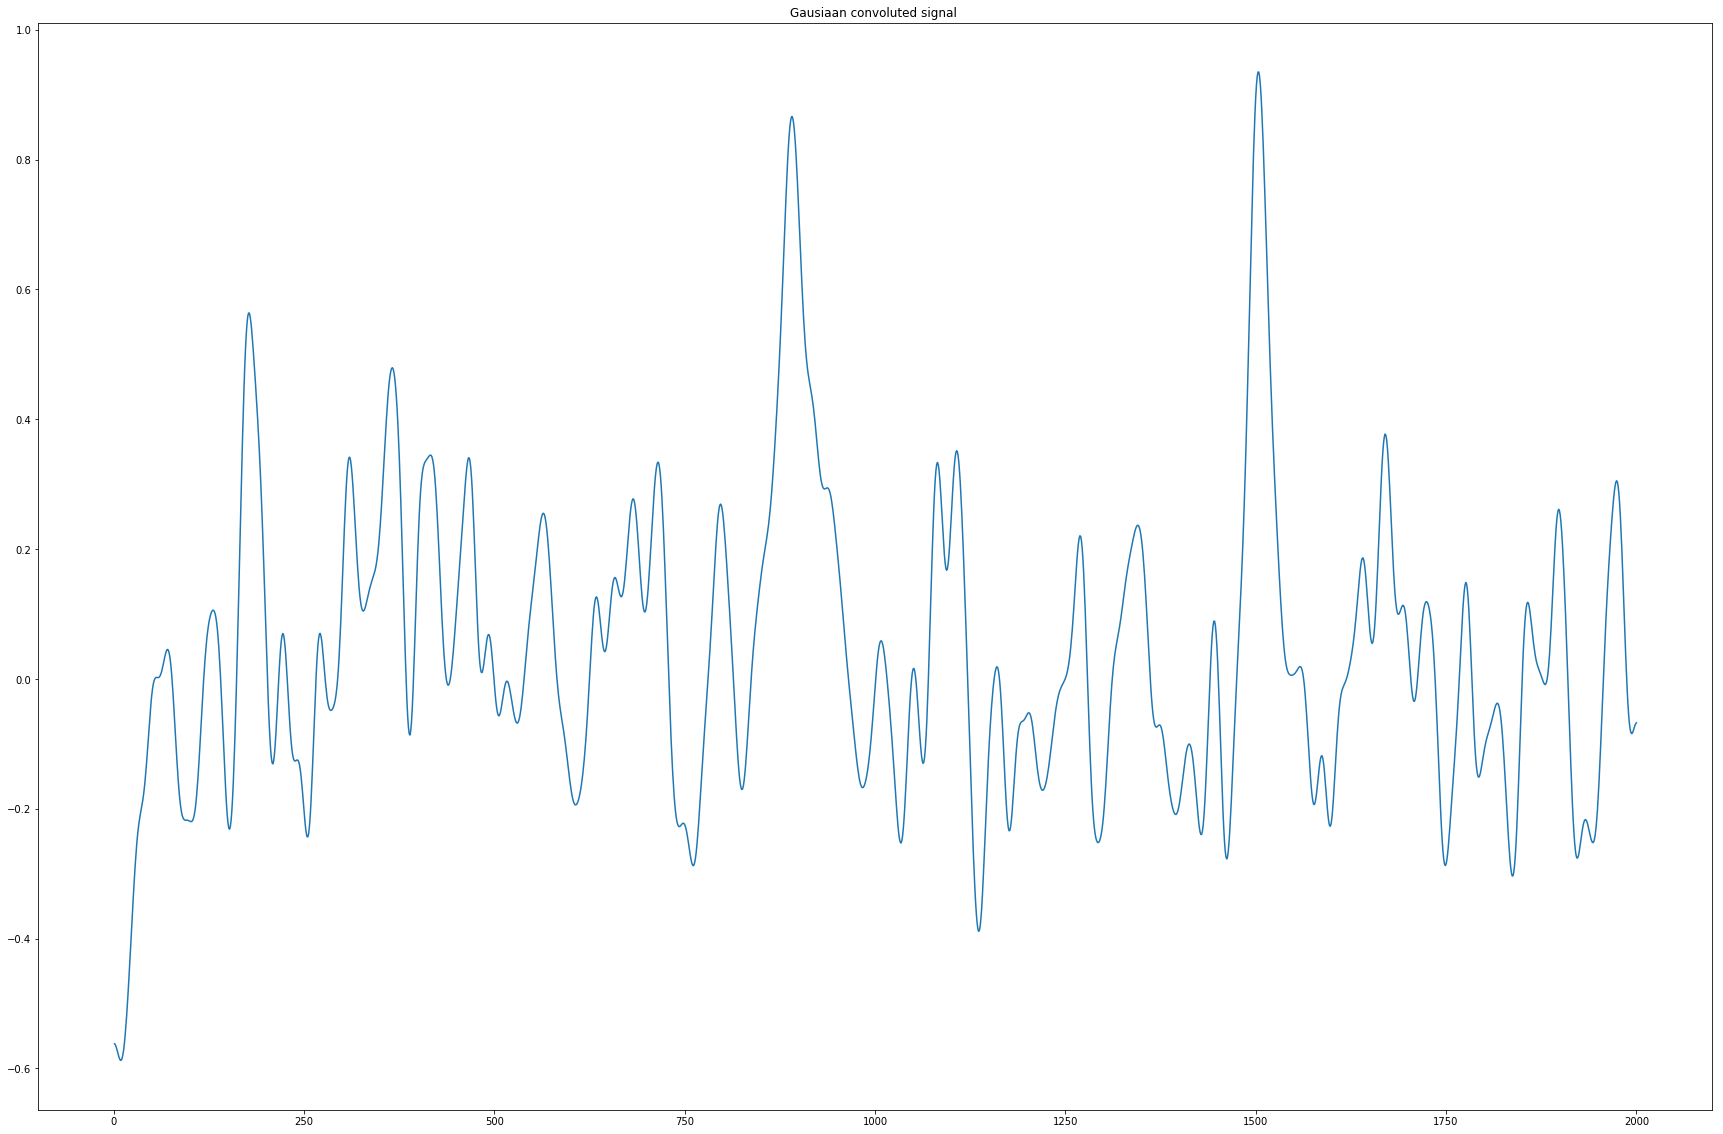

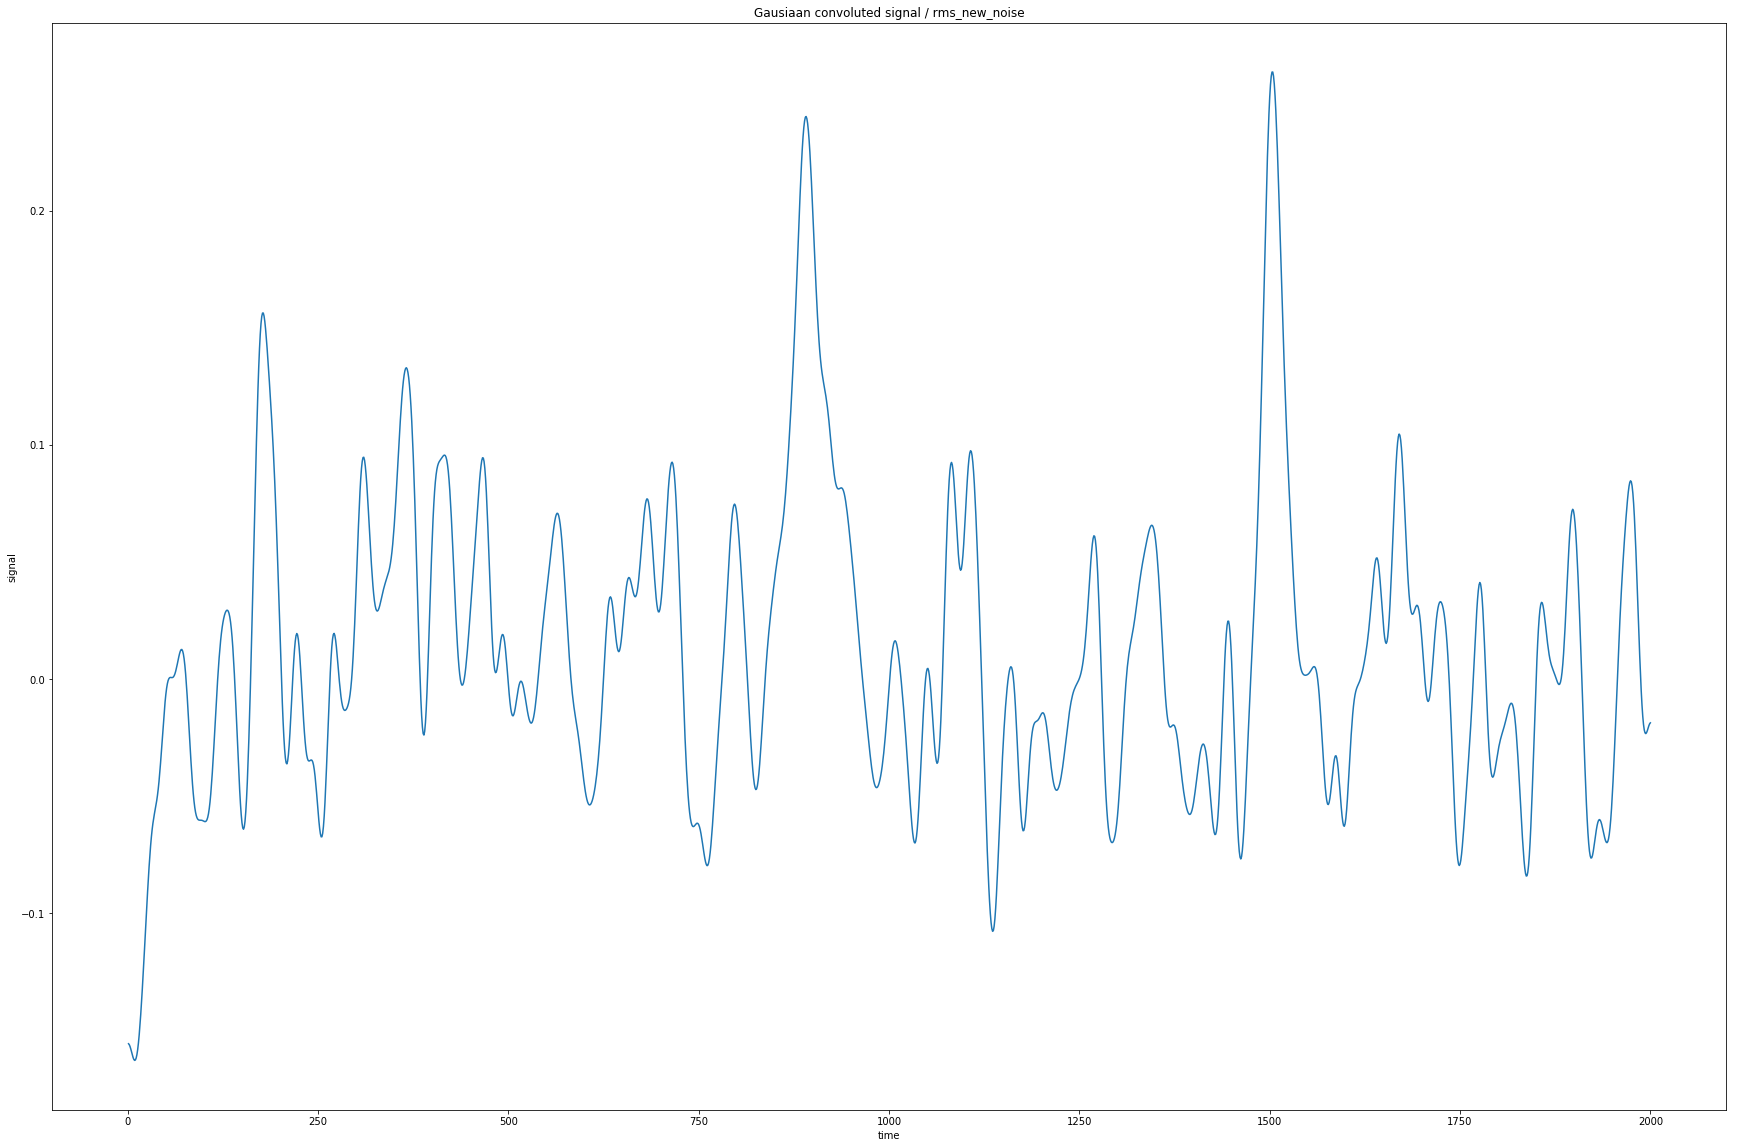

In [14]:
import numpy as np
import scipy.ndimage.filters 

import random
import matplotlib.pyplot as plt
import matplotlib as mpl

filein = open("hiro.dat","r")
time_data = []     #time 1D list
hiro_data = []      #signal 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    hiro_data.append(float(tokens[1]))

filein.close()

filein = open("noise.dat","r")
time_data = []     #time 1D list
noise_data = []      #pure noise 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    noise_data.append(float(tokens[1]))

filein.close()

#Now go on and process time_data and signal_data as two separates lists



    

#Plot of the pure noise data stream 2000 elements    
plt.plot(time_data, noise_data, "r")
#mpl.rcParams["figure.figsize"] = (15,10)
plt.xlabel("time")
plt.ylabel("noise")
plt.title("The pure noise data stream")
plt.show()



#plot of the signal with noise data stream 
plt.plot(time_data, hiro_data, "b")
#mpl.rcParams["figure.figsize"] = (15,10)
plt.xlabel("time")
plt.ylabel("noise with some signal")
plt.title("The noise data stream with some signal with it")
plt.show()




#convolve the gaussian noise on pure noise to get rms amplitude?
conv_hiro = scipy.ndimage.filters.gaussian_filter1d(hiro_data, 8., axis=-1, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
#conv_noise = scipy.ndimage.filters.gaussian_filter1d(noise_data, 1., axis=-1, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

plt.plot(time_data, conv_hiro)
plt.title("Gausiaan convoluted signal ")
plt.show()


plt.plot(time_data, conv_hiro/np.sqrt(13.))
plt.title("Gausiaan convoluted signal / rms_new_noise")
mpl.rcParams["figure.figsize"] = (30,20)
plt.xlabel("time")
plt.ylabel("signal")
plt.show()




# Fourier Transformation of the noise N(t) and signal s(t)=n(t) + S_GW(t) (Not completed)

[ 83.08903780 +0.j         -43.45468565-46.48059412j
 -43.92762561+20.67399274j ..., -76.10984266+52.97442218j
 -43.92762561-20.67399274j -43.45468565+46.48059412j]


/Users/hiro/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


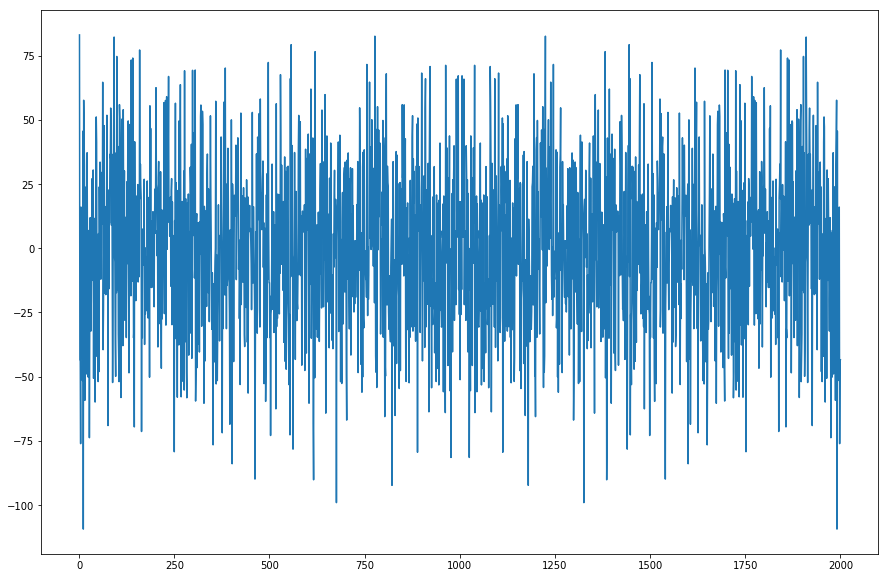

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

filein = open("hiro.dat","r")
time_data = []     #time 1D list
signal_data = []      #signal 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    signal_data.append(float(tokens[1]))

filein.close()

filein = open("noise.dat","r")
time_data = []     #time 1D list
noise_data = []      #pure noise 1D list
for line in filein.readlines():
    tokens = line.split()
    time_data.append(float(tokens[0]))
    noise_data.append(float(tokens[1]))

filein.close()


signal_fft = np.fft.fft(signal_data)
print signal_fft 
plt.plot(time_data, signal_fft)
plt.show()